# Importe de librerias

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Carga de datos

In [114]:
df = pd.read_csv("../data/credit_card_transactions.csv")
df.head()

,TransactionID,Time,Amount,CardholderName,MerchantName,MCC,Location,Device,IPAddress,TransactionSpeed,Fraud
0,1,2025-03-09 06:23:57,83.54,Sarah Murray,Oconnor-Hughes,5411,Longtown,Android,102.247.49.50,38.17,0
1,2,2025-02-14 05:17:36,805.88,Alexander Brooks,Reed PLC,5261,Woodsland,POS,153.157.50.7,49.84,0
2,3,2024-05-03 15:28:52,450.49,Harold Perez,Berry LLC,5261,Jessicatown,iOS,151.174.154.123,48.79,0
3,4,2024-05-03 09:01:14,782.39,Rebecca Davis,Berg Inc,5968,North Krystalburgh,Android,130.70.79.149,8.71,0
4,5,2025-04-24 17:24:39,713.02,Lauren Benson DDS,King-Gaines,5968,East Danielletown,Android,195.136.16.190,17.16,0


# EDA

In [115]:
df

,TransactionID,Time,Amount,CardholderName,MerchantName,MCC,Location,Device,IPAddress,TransactionSpeed,Fraud
0,1,2025-03-09 06:23:57,83.54,Sarah Murray,Oconnor-Hughes,5411,Longtown,Android,102.247.49.50,38.17,0
1,2,2025-02-14 05:17:36,805.88,Alexander Brooks,Reed PLC,5261,Woodsland,POS,153.157.50.7,49.84,0
2,3,2024-05-03 15:28:52,450.49,Harold Perez,Berry LLC,5261,Jessicatown,iOS,151.174.154.123,48.79,0
3,4,2024-05-03 09:01:14,782.39,Rebecca Davis,Berg Inc,5968,North Krystalburgh,Android,130.70.79.149,8.71,0
4,5,2025-04-24 17:24:39,713.02,Lauren Benson DDS,King-Gaines,5968,East Danielletown,Android,195.136.16.190,17.16,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2024-12-04 13:19:22,659.56,Zachary Morales,West LLC,5261,Brownborough,iOS,169.64.249.243,1.25,0
9996,9997,2024-12-23 16:53:22,290.46,Douglas Gallagher,Thompson-Phillips,5968,New Erin,Android,91.139.246.126,11.04,0
9997,9998,2025-01-30 19:45:52,337.55,Gregory Jarvis,"Williams, Castillo and Luna",5812,Alanville,iOS,183.67.160.124,27.00,0
9998,9999,2025-03-12 21:30:01,322.15,Kevin Pena,"English, Cervantes and Gutierrez",7299,East Martin,iOS,188.156.148.191,3.26,0


In [116]:
df.dtypes

TransactionID         int64
Time                 object
Amount              float64
CardholderName       object
MerchantName         object
MCC                   int64
Location             object
Device               object
IPAddress            object
TransactionSpeed    float64
Fraud                 int64
dtype: object

## Transformacion de datos

In [117]:
df['Time'] = pd.to_datetime(df['Time'], errors = 'coerce')
df['MCC'] = df['MCC'].astype(object)
df['Weekday'] = df['Time'].dt.weekday
df['Hour'] = df['Time'].dt.hour
df['Month'] = df['Time'].dt.month

In [118]:
df.head()

,TransactionID,Time,Amount,CardholderName,MerchantName,MCC,Location,Device,IPAddress,TransactionSpeed,Fraud,Weekday,Hour,Month
0,1,2025-03-09 06:23:57,83.54,Sarah Murray,Oconnor-Hughes,5411,Longtown,Android,102.247.49.50,38.17,0,6,6,3
1,2,2025-02-14 05:17:36,805.88,Alexander Brooks,Reed PLC,5261,Woodsland,POS,153.157.50.7,49.84,0,4,5,2
2,3,2024-05-03 15:28:52,450.49,Harold Perez,Berry LLC,5261,Jessicatown,iOS,151.174.154.123,48.79,0,4,15,5
3,4,2024-05-03 09:01:14,782.39,Rebecca Davis,Berg Inc,5968,North Krystalburgh,Android,130.70.79.149,8.71,0,4,9,5
4,5,2025-04-24 17:24:39,713.02,Lauren Benson DDS,King-Gaines,5968,East Danielletown,Android,195.136.16.190,17.16,0,3,17,4


In [119]:
df.describe()

,TransactionID,Time,Amount,TransactionSpeed,Fraud,Weekday,Hour,Month
count,10000.00000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2024-10-30 03:27:20.494300160,547.347491,30.738446,0.019200,2.995400,11.525500,6.528300
min,1.00000,2024-05-01 07:29:17,10.090000,0.110000,0.000000,0.000000,0.000000,1.000000
25%,2500.75000,2024-07-31 11:55:39.500000,263.222500,14.910000,0.000000,1.000000,6.000000,4.000000
50%,5000.50000,2024-10-30 22:49:50,512.240000,29.655000,0.000000,3.000000,12.000000,7.000000
75%,7500.25000,2025-01-28 03:57:06.750000128,759.935000,45.270000,0.000000,5.000000,17.000000,10.000000
max,10000.00000,2025-05-01 09:39:46,4988.070000,119.860000,1.000000,6.000000,23.000000,12.000000
std,2886.89568,NaN,460.047329,19.092345,0.137234,1.991626,6.932341,3.467795


In [120]:
df = df.drop(['CardholderName','TransactionID', 'Time', 'IPAddress'], axis=1)
df.isna().sum()

Amount              0
MerchantName        0
MCC                 0
Location            0
Device              0
TransactionSpeed    0
Fraud               0
Weekday             0
Hour                0
Month               0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x764d391a27d0>,
 'caps': [<matplotlib.lines.Line2D at 0x764d391a3b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x764d391a1e90>],
 'medians': [<matplotlib.lines.Line2D at 0x764d391a8f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x764d391a9950>],
 'means': []}

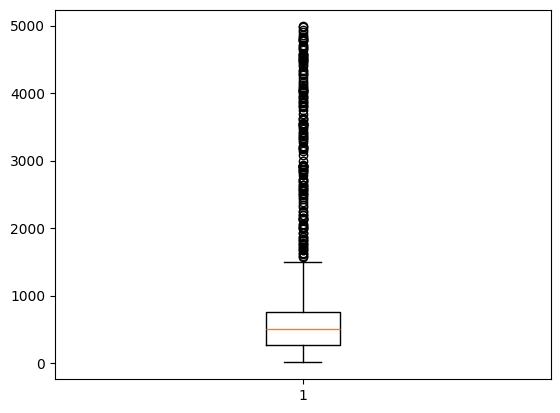

In [121]:
plt.boxplot(df['Amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x764d3a005050>,
 'caps': [<matplotlib.lines.Line2D at 0x764d3a0063d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x764d3a0046d0>],
 'medians': [<matplotlib.lines.Line2D at 0x764d3a007710>],
 'fliers': [<matplotlib.lines.Line2D at 0x764d3a007f50>],
 'means': []}

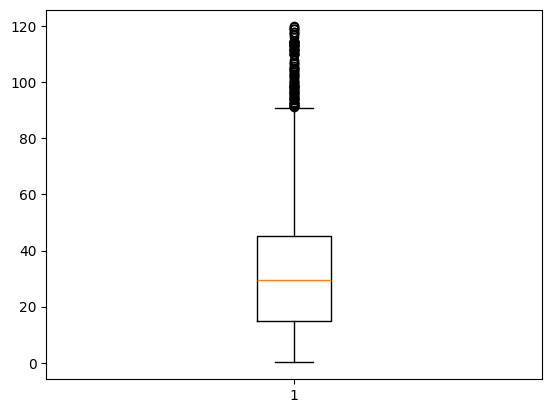

In [122]:
plt.boxplot(df['TransactionSpeed'])

In [123]:
# IQR Amount
q1 = df['Amount'].quantile(0.25)
q3 = df['Amount'].quantile(0.75)
iqr = q3 - q1

limite_superior = q3 + 1.5 * iqr

df['is_large_amount'] = (df['Amount'] > limite_superior).astype(int)


# IQR TransactionSpeed
q1 = df['TransactionSpeed'].quantile(0.25)
q3 = df['TransactionSpeed'].quantile(0.75)
iqr = q3 - q1

limite_superior = q3 + 1.5 * iqr

df['is_slow_transaction'] = (df['TransactionSpeed'] > limite_superior).astype(int)


In [124]:
#Data desbalanceada
fraudes = (df['Fraud'] == 0).sum()
noFraudes = (df['Fraud'] == 1).sum()

print('Proporciones')
print(f'Fraudes: {noFraudes/ (fraudes+noFraudes)}')
print(f'No fraudes: {fraudes/ (fraudes+noFraudes)}')

Proporciones
Fraudes: 0.0192
No fraudes: 0.9808


### Normalizacion de datos

In [125]:
categoricFeatures = ['MerchantName','Location', 'MCC', 'Device']
numericFeatures = ['Amount', 'TransactionSpeed']
all_features = numericFeatures + categoricFeatures

#Normalizacion para categoricas
for col in categoricFeatures:
      df[col] = LabelEncoder().fit_transform(df[col])

#Normalizacion para numericas y categoricas
df[numericFeatures] = scaler.fit_transform(df[numericFeatures])

In [126]:
print("Distribución original en el conjunto de entrenamiento:")
print(pd.Series(y_train).value_counts())

Distribución original en el conjunto de entrenamiento:
Fraud
0    7846
1     154
Name: count, dtype: int64


In [127]:
df.head()

,Amount,MerchantName,MCC,Location,Device,TransactionSpeed,Fraud,Weekday,Hour,Month,is_large_amount,is_slow_transaction
0,0.014755,5625,1,3302,0,0.317829,0,6,6,3,0,0
1,0.159862,6264,0,7656,1,0.415282,0,4,5,2,0,0
2,0.088470,534,0,2310,3,0.406514,0,4,15,5,0,0
3,0.155143,522,4,4645,0,0.071816,0,4,9,5,0,0
4,0.141208,4112,4,1155,0,0.142380,0,3,17,4,0,0


In [128]:
df

,Amount,MerchantName,MCC,Location,Device,TransactionSpeed,Fraud,Weekday,Hour,Month,is_large_amount,is_slow_transaction
0,0.014755,5625,1,3302,0,0.317829,0,6,6,3,0,0
1,0.159862,6264,0,7656,1,0.415282,0,4,5,2,0,0
2,0.088470,534,0,2310,3,0.406514,0,4,15,5,0,0
3,0.155143,522,4,4645,0,0.071816,0,4,9,5,0,0
4,0.141208,4112,4,1155,0,0.142380,0,3,17,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.130469,8205,0,445,3,0.009520,0,2,13,12,0,0
9996,0.056322,7711,4,3944,0,0.091273,0,0,16,12,0,0
9997,0.065782,8331,2,36,3,0.224551,0,3,19,1,0,0
9998,0.062688,1985,5,1405,3,0.026305,0,2,21,3,0,0


In [129]:
df.to_csv("../data/process_data.csv")